In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [40]:
app_train=pd.read_csv(r'C:\Users\PoYu\jupyter\Example_and_data\application_train.csv')
app_train.shape

(307511, 122)

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in app_train:
    if app_train[col].dtype=='object':
         if len(list(app_train[col].unique()))<=2:
            app_train[col]=le.fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
app_train['DAYS_EMPLOYED_AMOM']=app_train["DAYS_EMPLOYED"]==365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan},inplace=True)

app_train['DAYS_BIRTH']=abs(app_train['DAYS_BIRTH'])

In [43]:
app_train['DAYS_BIRTH']=round(app_train['DAYS_BIRTH']/365)
#app_train['DAYS_BIRTH'].value_counts()

bin_cut=np.linspace(0,100,11)
app_train['customized_DAYS_BIRTH']=pd.cut(app_train['DAYS_BIRTH'],bins=bin_cut)
app_train['customized_DAYS_BIRTH'].value_counts()

(30.0, 40.0]     82770
(40.0, 50.0]     75509
(50.0, 60.0]     67955
(20.0, 30.0]     48869
(60.0, 70.0]     32408
(90.0, 100.0]        0
(80.0, 90.0]         0
(70.0, 80.0]         0
(10.0, 20.0]         0
(0.0, 10.0]          0
Name: customized_DAYS_BIRTH, dtype: int64

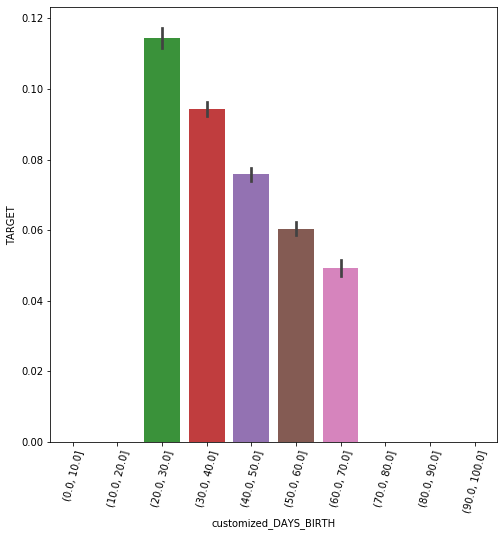

In [47]:
plt.figure(figsize=(8,8))

px=app_train['customized_DAYS_BIRTH']
py=app_train['TARGET']
sns.barplot(px,py)

plt.xticks(rotation=75);